In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The Curious Population Trends in Former Soviet States
### (The role of religion in the nations' fertility rates)

## Abstract

Even though the global population is still increasing, the overall fertility rate of the world is getting lower every year. Almost all states are either below the replacement level or are moving in that direction. However, there are a handful of countries that at first glance do not seem to be following this general pattern. In this article, we will be investigating whether the post-Soviet states have an advantage in returning to and maintaining higher fertility levels and to what extent religion may play a part in that process.

## Introduction

Let us first provide some context. In 1991, a series of events led to the dissolution of the USSR. As a result, thirteen states (fourteen, if one includes Moldova) were able to claim their independance. For the purposes of this paper, we will divide these countries into three groups, based on their geographical location and predominant population, as listed below:

**Baltic**: Estonia, Latvia, Lithuania

**Northeast Europe**: Belarus, Russia, Ukraine

**Caucasian**: Armenia, Azerbaijan, Georgia

**Central Asia**: Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan, Uzbekistan

These distinctions will play when looking at the fertility rates of each country. They may also be important later on, when checking how big of a factor religion is in that regard. 

#### Total Fertility Rates
Each state had its own unique fertility rate, although the regions in which they were located would often share similar tendencies *(fig 1-4)*.

In [105]:
def create_tfr_plot(ax, table, coordinates, x_col, y_col, col_cond, id_list, title, color_list, legend_list):
    legend_list.append('TFRr')
    year_values = np.array(table[x_col].unique())
    for i in range(len(id_list)):
        ax[coordinates[0], coordinates[1]].plot(year_values, table.loc[population_tfr_table[col_cond] == id_list[i], y_col].values, color=color_list[i])
    
    ax[coordinates[0], coordinates[1]].plot(year_values, [2.1 for _ in range(len(year_values))], color='black', linestyle='dotted')
    ax[coordinates[0], coordinates[1]].set_title(title)
    ax[coordinates[0], coordinates[1]].set_xlabel('Year')
    ax[coordinates[0], coordinates[1]].set_ylabel('Total Fertility Rate')
    ax[coordinates[0], coordinates[1]].set_yticks(np.arange(1.0, 7.5, 0.5))
    ax[coordinates[0], coordinates[1]].legend(legend_list, loc='upper right')

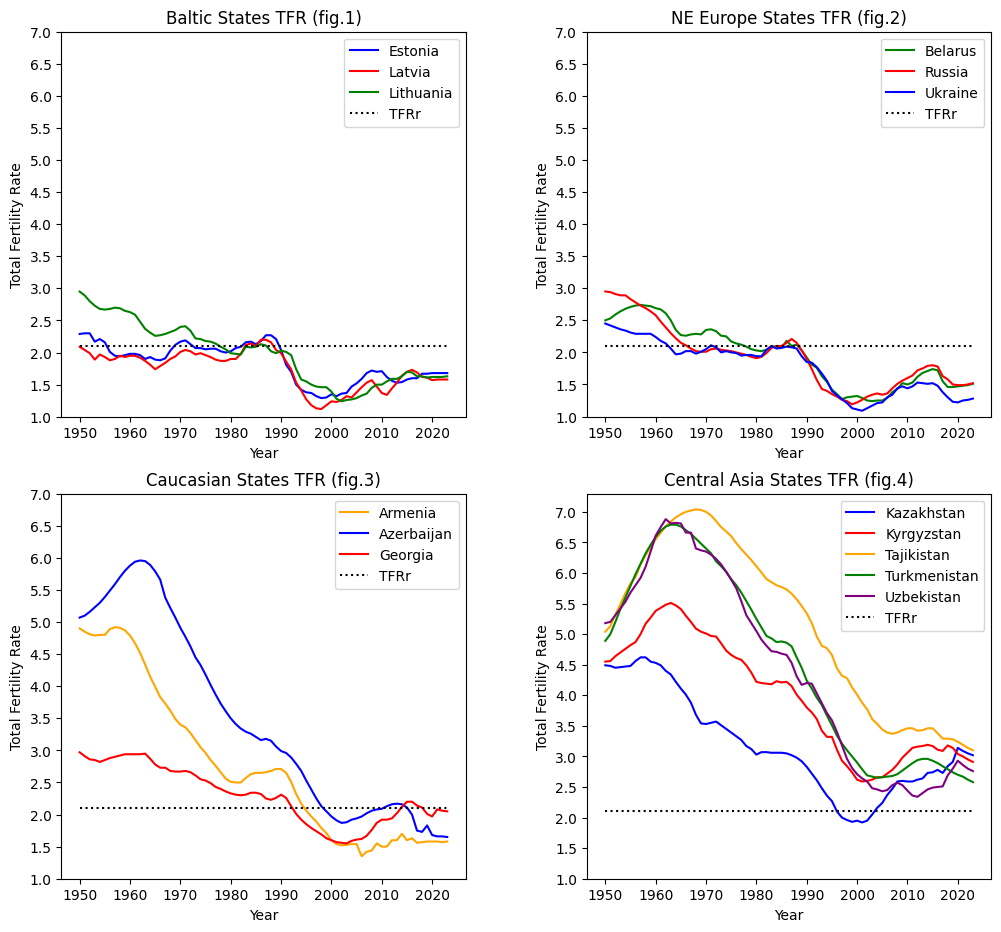

In [106]:
countries_table = pd.read_csv('sql-database/countries_table.csv')
population_tfr_table = pd.read_csv('sql-database/population_tfr_table.csv')

f, ax = plt.subplots(2, 2)
create_tfr_plot(ax, population_tfr_table, [0, 0], 'YearId', 'TFR', 'CountryId', [4, 8, 9], 'Baltic States TFR (fig.1)', 
                ['blue', 'red', 'green',], ['Estonia', 'Latvia', 'Lithuania'])
create_tfr_plot(ax, population_tfr_table, [0, 1], 'YearId', 'TFR', 'CountryId', [3, 10, 13], 'NE Europe States TFR (fig.2)', 
                ['green', 'red', 'blue'], ['Belarus', 'Russia', 'Ukraine'])
create_tfr_plot(ax, population_tfr_table, [1, 0], 'YearId', 'TFR', 'CountryId', [1, 2, 5], 'Caucasian States TFR (fig.3)', 
                ['orange', 'blue', 'red'], ['Armenia', 'Azerbaijan', 'Georgia'])
create_tfr_plot(ax, population_tfr_table, [1, 1], 'YearId', 'TFR', 'CountryId', [6, 7, 11, 12, 14], 'Central Asia States TFR (fig.4)', 
                ['blue', 'red', 'orange', 'green', 'purple'], ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'])

f.subplots_adjust(wspace=0.3, hspace=0.2)
f.set_figwidth(12)
f.set_figheight(11)
plt.show()


Northeast Europe and Baltic states seemed to experience a local maximum a few years before the end of the Soviet Union somewhere around the replacement level of 2.1 children per woman. After that, their TFR (total fertility rate) feel drastically during the 1990's and have since been fluctuating between 1.2 and 1.7. This is a pattern found often across other European countries.

In the Caucasian region, while the birth rates had been falling significantly overall since the 1960's, there was also a steep decrease between 1991 and the early 2000's. Since then, Armenia has remained varying around 1.5 children per woman, but Azerbaijan and Georgia were able to rise back above the replacement level. Only Georgia however has managed to stabilize somewhat around that number, while Azerbaijan suddenly experienced a steep decline around 2016 and has since fallen to similar levels as Armenia.

The Central Asia region is arguably the most unique out of the four. At first, its states followed a similar trend as those in the Caucases - most of them experiencing peaks in the TFR sometime in 1960's and then starting to decline, all before experiencing a steep decrease around the time of the USSR's dissolution. Kazakhstan was the first to recover on paper and has since returned its TFR to levels unseen since the 1980's, going from 1.92 in 2001 to 3.14 in 2020. Uzbekistan, although having experienced a second local minimum of 2.34 in 2012 returned to 2.93 in 2020. Kyrgyzstan reached a TFR of 3.19 in 2014 and 3.18 in 2018, after falling to its lowest on record of 2.59 in 2001. Despite this, each of these three states has had a declining TFR for the last four years. 

#### Local Minimum/Maximum Disparity

To garner a better understanding of the TFR graphs, we will first need to measure the most significant changes for each country. We can notice that after 1991, every nation experiences a decrease in fertility rates, resulting in a local minimim, followed by an increase to a local maximum. To make our measurement, we will take each of these highest and lowest points and calculate the difference between them, as well as the time it took for the country to create the difference. Judging by the graphs, no country had a local minimum after 2013 or a local maximum before 2007, so those will be our "border point", when looking for these low and high points.

In [107]:
tfr_disparities = []
disparity_periods = []
min_border_interval = 64
max_border_interval = 58
countries = countries_table['Name'].tolist()

In [108]:
for i in range(0, 14):
    start_point = i * 74
    end_point = start_point + 74
    min_border_point = start_point + min_border_interval
    max_border_point = start_point + max_border_interval
    loc_minimum = population_tfr_table['TFR'][start_point:min_border_point].min()
    loc_min_year = population_tfr_table['TFR'][start_point:min_border_point].idxmin()
    loc_maximum = population_tfr_table['TFR'][max_border_point:end_point].max()
    loc_max_year = population_tfr_table['TFR'][max_border_point:end_point].idxmax()
    disparity_tfr = loc_maximum - loc_minimum
    disparity_period = loc_max_year - loc_min_year
    tfr_disparities.append(round(disparity_tfr, 2))
    disparity_periods.append(disparity_period)

disparity_table = pd.DataFrame()
disparity_table['country'] = countries
disparity_table['tfr_disparity'] = tfr_disparities
disparity_table['period'] = disparity_periods
disparity_table

,country,tfr_disparity,period
0,Armenia,0.35,8
1,Azerbaijan,0.30,11
2,Belarus,0.50,12
3,Estonia,0.43,10
4,Georgia,0.65,12
5,Kazakhstan,1.22,19
6,Kyrgyzstan,0.60,13
7,Latvia,0.61,18
8,Lithuania,0.46,13
9,Russia,0.61,16


To get a better feel for how these countries compare to one another, let's visualize them in a scatter plot.

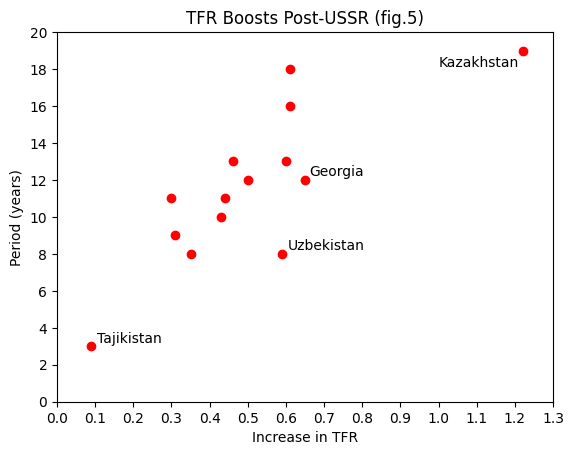

In [109]:
plt.scatter(disparity_table.tfr_disparity, disparity_table.period, color='r')
plt.title('TFR Boosts Post-USSR (fig.5)')
plt.xlabel('Increase in TFR')
plt.ylabel('Period (years)')
plt.xticks(np.arange(0.0, 1.4, 0.1))
plt.yticks(np.arange(0, 22, 2))
plt.annotate('Tajikistan', xy=(0.105, 3.2))
plt.annotate('Georgia', xy=(0.66, 12.25))
plt.annotate('Kazakhstan', xy=(1, 18.1))
plt.annotate('Uzbekistan', xy=(0.605, 8.22))
plt.show()

We can see from the different boosts in TFR after the collapse of the Soviet Union *(fig.5)* that Kazakhstan is by far the most impressive with a disparity of 1.22. Georgia and Uzbekistan are also noticable, as the first achieves the second biggest disparity in much less time, while the latter experiended one of the fastest increases and still made it to the top half of the list. Most other nations either experienced slower or smaller increases in fertility rates. Tajikistan is by both metrics the least impressive, as its growth period was only three years and the TFR increase was by less than 0.1. However, it should be noted that Tajikistan currently still has the highest fertility rate of all these states, making its lack of major improvement somewhat less significant. 

All this data so far demonstrates is simply that a collection of countries that were once a part of the Soviet Union (most of which are in Central Asia) have been able to secure fertility rates above or around the replacement level after drastic falls, following their independence. The question is, given the context of the rest of the world, was? For the rest of this article, we will pay close attention to Georgia, Kazakhstan, Kyrgyzstan and Uzbekistan, since they have demonstrated the most significant changes.

With this information in mind, let's now take a general look at what these states experienced economically following their independence.

### Economy of Post-Soviet Countries

For a bit of background, the former soviet nations initially entered a period of economic turmoil throughout the 1990's, although they have overall seen growths in their economies since the start of the new millenium. There were certain crises such as those occurring around 2008, 2014 and 2020 took their toll to different extents. GDP per capita went up in all states, although many of them peaked at some point in the early-mid 2010's and have not recovered fully since, as we can see from the image below *(img. 1)*. 

##### GDP Per Capita in Post Soviet States *(img. 1)*

<img src="GDP Per Capita Post Soviet States.jpg" width="500" height="340">

Interestingly enough, Georgia is the country to experience the most consistent growth in GDP per capita throughout that decade, while Azerbaijan saw the biggest drop out of all of them. This correlates with what we see in the fertility rates of this time period *(fig.3)*. Nevertheless, a fall in GDP per capita does not guarantee a fall in TFR. Kazakhstan too saw a decline in that regard, but its fertility rates continued growing until the end of the decade. Also, Uzbekistan's saw very little growth in its GDP per capita in the 2010's and yet its TFR rose for most of this period.

### Kazakhstan - the Main Outlier

Kazakhstan appears to be by far the most eccentric case for a country. There is no example (based on U.N. data since 1950) of a country falling below the replacement level and then returning so far above that number and staying there. Others have noticed this unique trend of the country's. In his 2023 article "Sustained and Universal Fertility Recuperation in Kazakhstan", Maxim Kan outlines how the local population has gotten to where it is in that regard. He focuses on the role of the economy and education in the demographic changes. His research shows that in addition to there being a correlation between economic growth and fertility rate increases, there were no changes in the progression to parenthood and births that followed among women, regardless of their education. While the fertility rate data he uses differs slightly to that of the United Nations' (the minimum TFR for the country, according to his research, was 1.80 in 1999), it becomes clear that rising prosperity in Kazakhstan had, if anything, a positive affect on birth rates. This is not typically the case, as can be observed in practically all developed nations. In Kazakhstan's situation, economic growth helped women to have more children on average, something that had become a hinderance during the 1990's.

Even then, Kazakhstan's increase in TFR is arguably astonishing, expecially considering it has now briefly surpassed the fertility rates it had been enduring in the 1980's. We might expect something other than economics and education to play a role in this equation. One suggestion was posed at the end of Kan's paper, which said that further research into the role of religion in the country's TFR increase could be undertaken. This we shall now do.

### Georgia vs. Uzbekistan vs. Kazakhstan 
#### Prosperity (Education & Economy)

#### Religiosity


## Hypotheses

Based on all of these findings we will draw up two different hypotheses:
 1) Countries with **higher total fertility rates** will have **higher levels of religiosity**
 2) **Kazakhstan** will have had the **biggest increase in religiosity** out of all former Soviet nations
 3) **Georgia** will be the **most religious state outside of Central Asia**

## Calculations

### Data on Religiosity

Firstly, let's see what data we have at our disposal on religiosity in these areas. The Association of Religion Data Archives (ARDA) presents us with data on the proportion of religious groups in each country. Unfortunately, this information is presented only for 1970, 2000 and 2020, leaving us with many blind spots. Nonetheless, it may be a useful point of reference for how religious groups have changed since the states gained their independence.

In [110]:
rel_arda_table = pd.read_csv('sql-database/religiosity_arda_table.csv')

In [111]:
def plot_religiosity_arda(ax, table, coordinates, x_col, col_cond, country_id, title):
    yrs = religiosity_arda_table[x_col].unique()
    ax[coordinates[0], coordinates[1]].plot(yrs, table.loc[table[col_cond] == country_id, 'Christianity'], color='r', marker="o")
    ax[coordinates[0], coordinates[1]].plot(yrs, table.loc[table[col_cond] == country_id, 'Islam'], color='g', marker="o")
    ax[coordinates[0], coordinates[1]].plot(yrs, table.loc[table[col_cond] == country_id, 'Nonreligious'], color='black', marker="o")
    ax[coordinates[0], coordinates[1]].set_title(title)
    ax[coordinates[0], coordinates[1]].set_xlabel('Year')
    ax[coordinates[0], coordinates[1]].set_ylabel('Percentage (%)')
    ax[coordinates[0], coordinates[1]].set_yticks(np.arange(0, 101, 20))

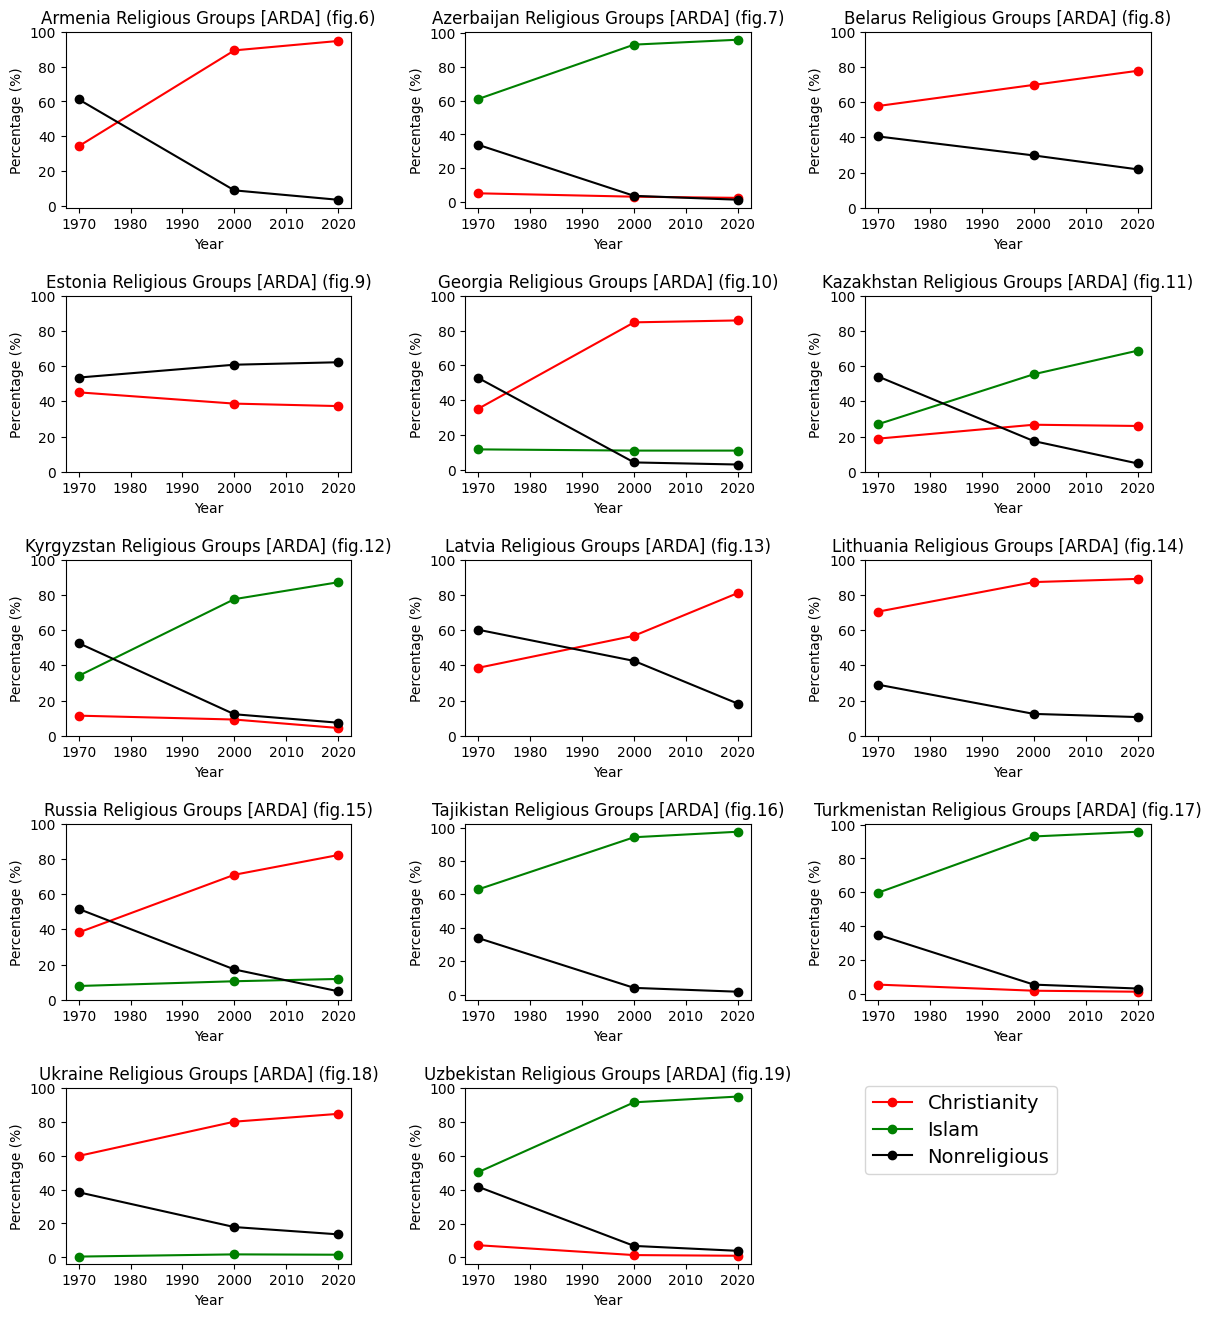

In [112]:
f, ax = plt.subplots(5, 3)

plot_religiosity_arda(ax, rel_arda_table, [0, 0], 'YearId', 'CountryId', 1, 'Armenia Religious Groups [ARDA] (fig.6)')
plot_religiosity_arda(ax, rel_arda_table, [0, 1], 'YearId', 'CountryId', 2, 'Azerbaijan Religious Groups [ARDA] (fig.7)')
plot_religiosity_arda(ax, rel_arda_table, [0, 2], 'YearId', 'CountryId', 3, 'Belarus Religious Groups [ARDA] (fig.8)')
plot_religiosity_arda(ax, rel_arda_table, [1, 0], 'YearId', 'CountryId', 4, 'Estonia Religious Groups [ARDA] (fig.9)')
plot_religiosity_arda(ax, rel_arda_table, [1, 1], 'YearId', 'CountryId', 5, 'Georgia Religious Groups [ARDA] (fig.10)')
plot_religiosity_arda(ax, rel_arda_table, [1, 2], 'YearId', 'CountryId', 6, 'Kazakhstan Religious Groups [ARDA] (fig.11)')
plot_religiosity_arda(ax, rel_arda_table, [2, 0], 'YearId', 'CountryId', 7, 'Kyrgyzstan Religious Groups [ARDA] (fig.12)')
plot_religiosity_arda(ax, rel_arda_table, [2, 1], 'YearId', 'CountryId', 8, 'Latvia Religious Groups [ARDA] (fig.13)')
plot_religiosity_arda(ax, rel_arda_table, [2, 2], 'YearId', 'CountryId', 9, 'Lithuania Religious Groups [ARDA] (fig.14)')
plot_religiosity_arda(ax, rel_arda_table, [3, 0], 'YearId', 'CountryId', 10, 'Russia Religious Groups [ARDA] (fig.15)')
plot_religiosity_arda(ax, rel_arda_table, [3, 1], 'YearId', 'CountryId', 11, 'Tajikistan Religious Groups [ARDA] (fig.16)')
plot_religiosity_arda(ax, rel_arda_table, [3, 2], 'YearId', 'CountryId', 12, 'Turkmenistan Religious Groups [ARDA] (fig.17)')
plot_religiosity_arda(ax, rel_arda_table, [4, 0], 'YearId', 'CountryId', 13, 'Ukraine Religious Groups [ARDA] (fig.18)')
plot_religiosity_arda(ax, rel_arda_table, [4, 1], 'YearId', 'CountryId', 14, 'Uzbekistan Religious Groups [ARDA] (fig.19)')

f.delaxes(ax[4][2])
plt.figlegend(['Christianity', 'Islam', 'Nonreligious'], loc="lower right", bbox_to_anchor=(0.84, 0.16), labelspacing=0.4, prop={'size': 14})
f.subplots_adjust(wspace=0.4, hspace=0.5)
f.set_figwidth(14)
f.set_figheight(16)
plt.show()


The first thing that becomes apparent is that each country experienced a surge in people proclaiming to belong to a religious denomination following independence with Estonia being the only exception. Armenia seems to have made the biggest increase in its religious community, going from 34% Christian in 1970 to 94% Christian in 2020. This would appear to disprove the idea that bigger increases in religiosity result in a higher TFR. What is important to remember however is that until around the year 2000, all countries were affected by economic issues. For instance, we may consider the possibility that in such times of turmoil, especially with greater religious freedoms at hand, people turned to their religious communities (this would need to be examined further and could be the topic of another research paper).

This is way of measuring religiosity is too unclear though. Proclaiming to belong to a religious group does not give us good enough insight into people's values. We need a way of measuring how much people cherish(ed) their religion and how important they considered it to be in their lives. Such a picture can be pieced together to some extent using data from the World Values Survey (WVS), which asks different people from different countries (at least 1000 citizens per country in each survey) across certain periods about what they merit in life and by how much. They also collect data on their subjects' religious identity, meaning we can compare it with the ARDA data, to check for any discrepancies. We will try and work out a formula for weighing in a country's religiosity for each survey year since 1995. Once again, it should be noted that there are many blind spots in this data, as some countries have been surveyed less often than others, not to mention at different times. Latvia and Lithuania for example have not been surveyed for over a quater of a century.

In [113]:
rel_wvs_table = pd.read_csv('sql-database/religiosity_wvs_table.csv')

In [114]:
rel_wvs_table

,Id,CountryId,YearId,Christianity,Islam,Nonreligious,Other,Very Important,Rather Important,Not Very Important,Not Important,Undecided
0,1,1,1997,84.5,0.0,13.2,2.3,25.0,36.8,22.6,9.6,6.0
1,2,1,2011,90.1,0.1,6.5,3.3,57.5,31.8,7.1,3.5,0.1
2,3,1,2021,90.4,0.0,7.6,2.0,71.3,18.0,7.0,3.2,0.5
3,4,2,1997,2.2,91.0,0.6,6.2,29.5,52.5,13.2,3.3,1.4
4,5,2,2011,1.7,97.1,1.1,0.2,35.9,33.3,20.5,10.2,0.0
5,6,3,1996,62.5,0.1,34.2,3.1,20.0,31.0,25.2,15.4,8.4
6,7,3,2011,85.4,0.3,13.5,0.8,15.9,32.1,33.4,17.4,1.2
7,8,4,1996,26.0,0.3,71.2,2.6,7.9,19.4,37.5,32.7,2.4
8,9,4,2011,32.6,0.2,64.3,2.8,7.6,17.7,37.4,35.7,1.6
9,10,5,1996,89.1,3.7,6.2,1.0,49.3,34.1,10.8,5.6,0.2


### Determining levels of Religiosity

The WVS question we will be focusing on is, as they say in their questionaire, to "indicate how important it (religion) is in your life". The options given were as follows: "Very Important", "Rather Important", "Not Very Important", "Not Important", as well as "Don't Know" or "No Answer". For our purposes, we have rounded the "Don't Know" and "No Answer" responses down to one category, labeled "Undecided". A value will need to be assigned each of these answers.

As the "Undecided" category is not informative, we will consider that category to have no substantial value (0). Regarding the others, we will assume that there is on average an equal difference in the imoprtance of religion to people in each of those groups. In other words, the difference in importance to people who, for instance, answered "very important" and "rather important" is on average the same difference found between those who answered "rather important" and "not very important". We will also assign the first two answers with a positive value and the latter two with a negative value. Since our assumption is that the difference in the level of importance is on average identitical, the values will be as follows:
 * Very Important: **3**
 * Rather Important: **1**
 * Not Very Important: **-1**
 * Not Important: **-3**
 * Undecided: **0**

As a result we will get the following formula for producing a level of religiosity, based on this data:

$$ RL = \frac{3 (vi - ni) + ri - nvi} {300} $$

In [115]:
def cal_religiosity_level(vi, ri, nvi, ni):
    rl = (3 * (vi - ni) + ri - nvi) / 300
    rl = round(rl, 2)
    return rl

This will produce a number between -1 and 1, where -1 would mean that religion is of no importance to anyone in the country, while 1 would mean religion was very important to everyone in the country. With this method of measurement now established. 

We will now apply it to our available data.

## Calculating Religiosity Level

In [116]:
vi_list, ri_list = rel_wvs_table['Very Important'].tolist(), rel_wvs_table['Rather Important'].tolist()
nvi_list, ni_list = rel_wvs_table['Not Very Important'].tolist(), rel_wvs_table['Not Important'].tolist()
rel_level_list = [cal_religiosity_level(vi_list[i-1], ri_list[i-1], nvi_list[i-1], ni_list[i-1]) for i in rel_wvs_table['Id']]

rel_wvs_table['Religiosity Level'] = rel_level_list

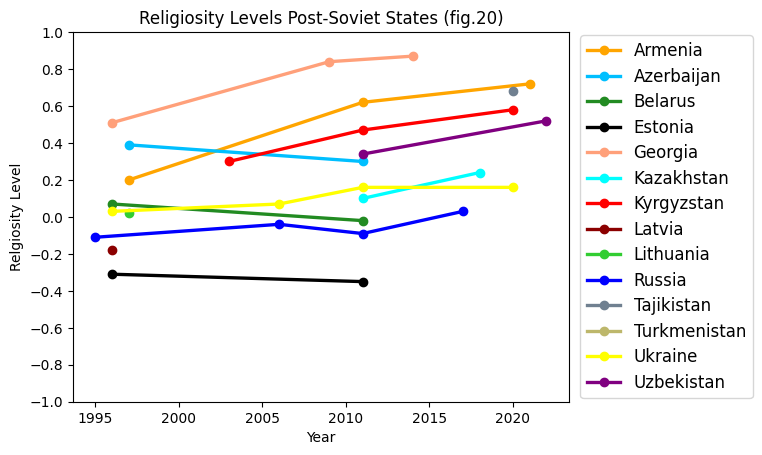

In [119]:
rl_color_list = ['orange', 'deepskyblue', 'forestgreen', 'black', 'lightsalmon', 'cyan', 'red', 'darkred', 'limegreen', 'blue', 'slategrey', 'darkkhaki', 'yellow', 'purple']

for i in range(1, 15):
    plt.plot(rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'YearId'], 
             rel_wvs_table.loc[rel_wvs_table['CountryId'] == i, 'Religiosity Level'], 
             color=rl_color_list[i-1],
             linewidth=2.4,
             marker="o")

plt.xlabel('Year')
plt.ylabel('Relgiosity Level')
plt.yticks(np.arange(-1, 1.01, 0.2))
plt.title('Religiosity Levels Post-Soviet States (fig.20)')
plt.figlegend(countries, loc="lower right", bbox_to_anchor=(1.2, 0.1), labelspacing=0.45, prop={'size': 12})
plt.show()

When taking a look at the results from the religiosity level calculation *(fig.20)* one can see that Georgia rated the highest out of all states with levels on 0.84 and 0.87 in 2009 and 2014 respectively. This would seem to be in alignment with hypothesis 3, as even the Central Asian countries have not recorded such rates. Because ten years have passed since the last survey however, we would require fresh data to compare it to more recent results elsewhere. As we presumed, Kazakhstan, Uzbekistan and Kyrgyzstan all saw their rates growing, although too few surveys were conducted to get any clear picture of their situations before the 2010's. Kazakhstan actually had the lowest rates of all the Central Asian countries when surveyed, even though it saw an increase from 0.10 to 0.24 between 2011 and 2018. Armenia continues to demonstrate strong levels of religiosity, making its situation a possible counter argument for hypothesis 1. Azerbaijan actually saw an overall decrease in their levels between 1997 and 2011, despite the fact that their TFR was roughly the same for both those years. Still, these two surveys do not show what had happened throughout that period. Meanwhile, northeast European countries saw somewhat fluctuating rates between -0.2 and 0.2. We have almost no data for the Baltic states after 1997, making them too unsuitable for analysis in this case.

In [118]:
rel_wvs_table[['CountryId', 'Religiosity Level', 'YearId']]

,CountryId,Religiosity Level,YearId
0,1,0.20,1997
1,1,0.62,2011
2,1,0.72,2021
3,2,0.39,1997
4,2,0.30,2011
5,3,0.07,1996
6,3,-0.02,2011
7,4,-0.31,1996
8,4,-0.35,2011
9,5,0.51,1996



Finally, to get a better understanding of how each state's religiosity level has been changing between surveys, we will calculate a "most recent growth rate" for those, which we have at least two surveys for. As some states have 0 or 1 surveys conducted, they will be excluded from this calculation. The formula by which we will do this will include dividing the difference in the religiosity levels between two surveys by the time period that seperated them.

$$ GR_{RL} = \frac{|RL_{1} - RL_{2}|} {t_{2} - t_{1}} $$

In [ ]:
def cal_rl_growth_rate(rl1, rl2, year1, year2):
    